In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

df = pd.read_csv('movies.csv')
data = df.copy()

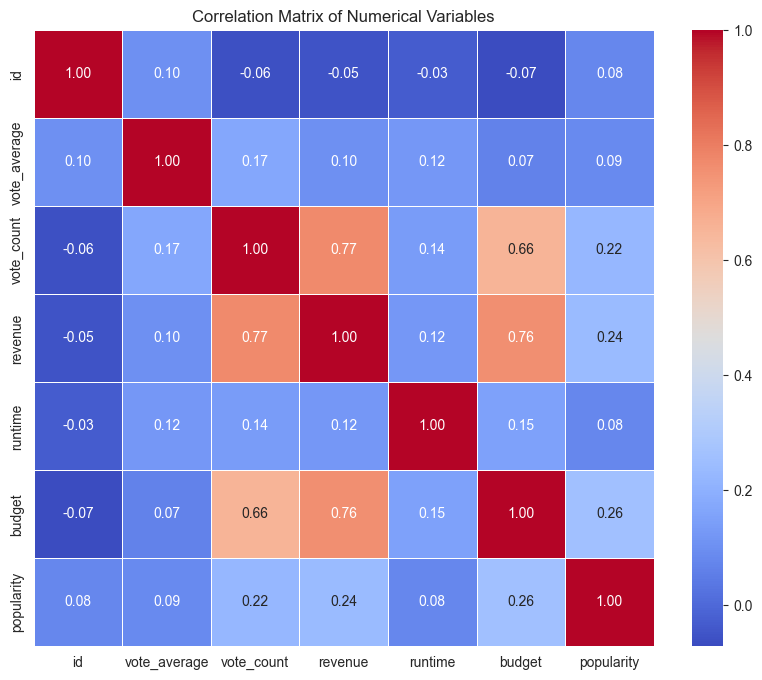

In [3]:
# Select only numerical columns for correlation
numeric_data = data.select_dtypes(include=[np.number])

# Compute correlation matrix AFTER PREPROCESSING
corr_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

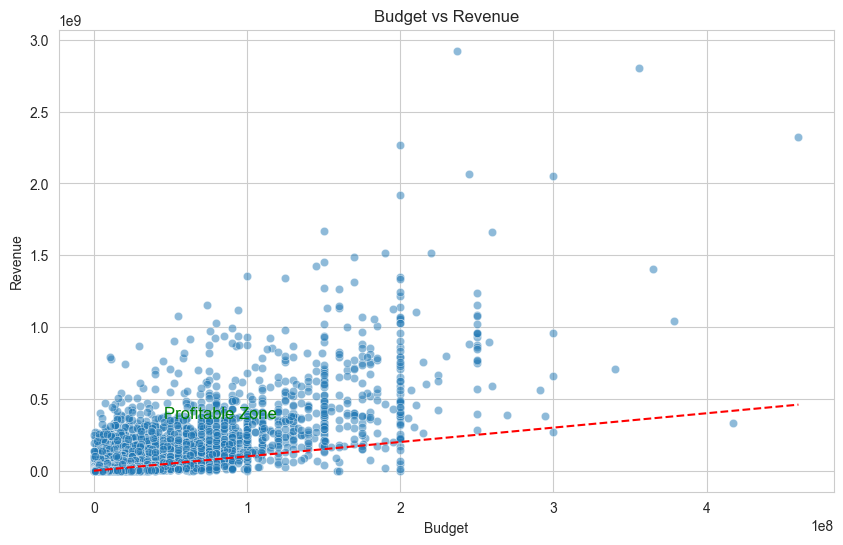

Top 5 Most Profitable Movies:
                            title     budget     revenue      profit
3                          Avatar  237000000  2923706026  2686706026
15              Avengers: Endgame  356000000  2800000000  2444000000
17                        Titanic  200000000  2264162353  2064162353
282      Avatar: The Way of Water  460000000  2320250281  1860250281
56   Star Wars: The Force Awakens  245000000  2068223624  1823223624


In [4]:
# Create a Profit column
data['profit'] = data['revenue'] - data['budget']

# Filter for movies that actually have financial data (budget & revenue > 0)
financials = data[(data['budget'] > 0) & (data['revenue'] > 0)]

# Plot correlation between Budget and Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=financials, alpha=0.5)
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')

# Add a diagonal line (Break-even point)
plt.plot([0, financials['budget'].max()], [0, financials['budget'].max()], color='red', linestyle='--')
plt.text(financials['budget'].max()*0.1, financials['budget'].max()*0.8, 'Profitable Zone', fontsize=12, color='green')
plt.show()

print("Top 5 Most Profitable Movies:")
print(financials.nlargest(5, 'profit')[['title', 'budget', 'revenue', 'profit']])